## **Importing Libaries**




In [1]:
from collections import Counter #This method returns the list of elements in the counter.
import string

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## **Importing Dataset**
###  Brief description on the 'Training' and 'Testing' dataset.
######  ---A training dataset is the initial data used to train machine learning models, it  teaches the ML models to identify desired patterns or perform a particular task.

######---  A testing dataset is used to evaluate how effective the training was or how accurate the model is.

In [2]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [3]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
print('The shape of the train dataset is :' ,train.shape)

The shape of the train dataset is : (8693, 14)


In [7]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [8]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [9]:
for i in train.columns:
  print(i, ';', train[i].unique())

PassengerId ; ['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02']
HomePlanet ; ['Europa' 'Earth' 'Mars' nan]
CryoSleep ; [False True nan]
Cabin ; ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
Destination ; ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
Age ; [39. 24. 58. 33. 16. 44. 26. 28. 35. 14. 34. 45. 32. 48. 31. 27.  0.  1.
 49. 29. 10.  7. 21. 62. 15. 43. 47.  2. 20. 23. 30. 17. 55.  4. 19. 56.
 nan 25. 38. 36. 22. 18. 42. 37. 13.  8. 40.  3. 54.  9.  6. 64. 67. 61.
 50. 41. 57. 11. 52. 51. 46. 60. 63. 59.  5. 79. 68. 74. 12. 53. 65. 71.
 75. 70. 76. 78. 73. 66. 69. 72. 77.]
VIP ; [False True nan]
RoomService ; [   0.  109.   43. ... 1569. 8586.  745.]
FoodCourt ; [   0.    9. 3576. ... 3208. 6819. 4688.]
ShoppingMall ; [   0.   25.  371. ... 1085.  510. 1872.]
Spa ; [   0.  549. 6715. ... 2868. 1107. 1643.]
VRDeck ; [   0.   44.   49. ... 1164.  971. 3235.]
Name ; ['Maham Ofracculy' 'Juanna Vines' 'Altark Susent' ... 'Fayey Connon'
 'Celeon Hont

# Exploratory Data Analysis

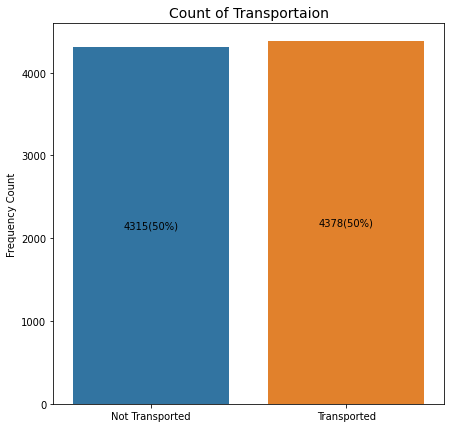

In [10]:
fig, ax = plt.subplots(figsize=(7, 7))

sns.barplot(
    x= train["Transported"].value_counts().index, y=train["Transported"].value_counts(), 
    data=train
)

ax.set_xticklabels(['Not Transported', 'Transported'])
ax.set_ylabel("Frequency Count")
ax.set_title("Count of Transportaion", fontsize=14)

for bar in ax.patches:
    label_x = bar.get_x() + bar.get_width() / 2
    label_y = bar.get_y() + bar.get_height() / 2

    ax.text(
        label_x, label_y, 
        str(int(bar.get_height())) + '(' +
        '{:.0%}'.format(bar.get_height() / len(train.Transported)) + ')',
        horizontalalignment='center', verticalalignment='center', color='black'
    )

#### HomePlanet Count

Text(0.5, 0, 'Planets')

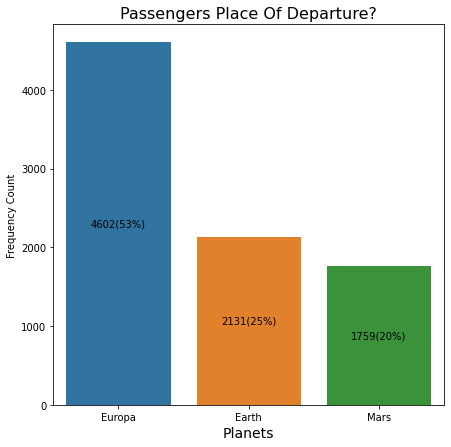

In [11]:
fig, HomePlanet = plt.subplots(figsize=(7, 7))

sns.barplot(
    x=train['HomePlanet'].value_counts().index,
    y=train['HomePlanet'].value_counts()
)
HomePlanet.set_xticklabels(['Europa', 'Earth', 'Mars'])
HomePlanet.set_ylabel("Frequency Count")
HomePlanet.set_title("HomePlanet Count")

for bar in HomePlanet.patches:
    label_x = bar.get_x() + bar.get_width() / 2
    label_y = bar.get_y() + bar.get_height() / 2

    HomePlanet.text(
        label_x, label_y, 
        str(int(bar.get_height())) + '(' + '{:.0%}'.format(bar.get_height() / len(train["HomePlanet"])) + ')', 
        horizontalalignment='center', verticalalignment='center', color='black')

HomePlanet.set_title("Passengers Place Of Departure?", fontsize=16)
HomePlanet.set_xlabel("Planets", fontsize=14)
    

# Data Preprocessing

In [12]:
# CREATE A NEW COLUMN TO HOLD SUM OF ALL EXPENSES
train["Expenses"] = train.iloc[:,7:12].sum(axis=1)
train["CryoSleep"].fillna('Unknown',inplace=True)

test["Expenses"] = test.iloc[:,7:12].sum(axis=1)
test["CryoSleep"].fillna('Unknown',inplace=True)

In [13]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Expenses
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0


In [14]:
# FILLING UNKNOWN CRYOSLEEP WITH BOOL
def fill_cryosleep(x,y):
    if x == 'Unknown' and y == 0:
        return True
    elif x == 'Unknown' and y != 0:
        return False
    else:
        return x

In [15]:
train['CryoSleep']  = train[['CryoSleep','Expenses']].apply(lambda value : fill_cryosleep(value['CryoSleep'],
                                                                        value['Expenses']), axis = 1)

In [16]:
test['CryoSleep']  = test[['CryoSleep','Expenses']].apply(lambda value : fill_cryosleep(value['CryoSleep'],
                                                                        value['Expenses']), axis = 1)

In [17]:
# MEAN OF NUMERICAL TRAIN VALUES
RoomService_mean = train.loc[train.CryoSleep == 0]['RoomService'].mean()
FoodCourt_mean = train.loc[train.CryoSleep == 0]['FoodCourt'].mean()
ShoppingMall_mean = train.loc[train.CryoSleep == 0]['ShoppingMall'].mean()
Spa_mean = train.loc[train.CryoSleep == 0].Spa.mean()
Vrdeck_mean = train.loc[train.CryoSleep == 0].VRDeck.mean()

In [18]:
# MEAN OF NUMERICAL TEST VALUES 
RoomService_mean_test = test.loc[test.CryoSleep == 0]['RoomService'].mean()
FoodCourt_mean_test = test.loc[test.CryoSleep == 0]['FoodCourt'].mean()
ShoppingMall_mean_test = test.loc[test.CryoSleep == 0]['ShoppingMall'].mean()
Spa_mean_test = test.loc[test.CryoSleep == 0].Spa.mean()
Vrdeck_mean_test = test.loc[test.CryoSleep == 0].VRDeck.mean()

In [19]:
# FILLING OTHER NUMERICAL COLUMNS WITH 0 OR MEAN
train.iloc[:,7:12] = train.iloc[:,7:12].fillna("Unknown")
def fill_otherValues(x,y,mean):
    if x == True and y == 'Unknown' :
        return 0
    elif x == False and y == "Unknown":
        return mean
    else:
        return y

In [20]:
train.RoomService = train[['CryoSleep','RoomService']].apply(lambda room: fill_otherValues(room['CryoSleep'],room['RoomService'],RoomService_mean),axis=1)
train.FoodCourt = train[['CryoSleep','FoodCourt']].apply(lambda room: fill_otherValues(room['CryoSleep'],room['FoodCourt'],FoodCourt_mean),axis=1)
train.ShoppingMall = train[['CryoSleep','ShoppingMall']].apply(lambda room: fill_otherValues(room['CryoSleep'],room['ShoppingMall'],ShoppingMall_mean),axis=1)
train.Spa = train[['CryoSleep','Spa']].apply(lambda room: fill_otherValues(room['CryoSleep'],room['Spa'],Spa_mean),axis=1)
train.VRDeck = train[['CryoSleep','VRDeck']].apply(lambda room: fill_otherValues(room['CryoSleep'],room['VRDeck'],Vrdeck_mean),axis=1)

In [21]:
test.iloc[:,7:12] = test.iloc[:,7:12].fillna("Unknown")

test.RoomService = test[['CryoSleep','RoomService']].apply(lambda room: fill_otherValues(room['CryoSleep'],room['RoomService'],RoomService_mean_test),axis=1)
test.FoodCourt = test[['CryoSleep','FoodCourt']].apply(lambda room: fill_otherValues(room['CryoSleep'],room['FoodCourt'],FoodCourt_mean_test),axis=1)
test.ShoppingMall = test[['CryoSleep','ShoppingMall']].apply(lambda room: fill_otherValues(room['CryoSleep'],room['ShoppingMall'],ShoppingMall_mean_test),axis=1)
test.Spa = test[['CryoSleep','Spa']].apply(lambda room: fill_otherValues(room['CryoSleep'],room['Spa'],Spa_mean_test),axis=1)
test.VRDeck = test[['CryoSleep','VRDeck']].apply(lambda room: fill_otherValues(room['CryoSleep'],room['VRDeck'],Vrdeck_mean_test),axis=1)

In [22]:
# CREATE NEW FEATURES FROM CABIN
train['Cabin_side'] = train.Cabin.str.split('/',expand = True)[2]
train['Cabin_num'] = train.Cabin.str.split('/',expand = True)[1]
train['Cabin_deck'] = train.Cabin.str.split('/',expand = True)[0]

test['Cabin_side'] = test.Cabin.str.split('/',expand = True)[2]
test['Cabin_num'] = test.Cabin.str.split('/',expand = True)[1]
test['Cabin_deck'] = test.Cabin.str.split('/',expand = True)[0]

In [23]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Expenses,Cabin_side,Cabin_num,Cabin_deck
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,P,0,B
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,S,0,F
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,S,0,A
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,S,0,A
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,S,1,F


In [24]:
# DROPPING COLUMNS
cols_2_drop = ['Cabin', 'Name']

train.drop(cols_2_drop,axis=1,inplace=True)
test.drop(cols_2_drop,axis=1,inplace=True)

In [25]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep         0
Destination     182
Age             179
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
Expenses          0
Cabin_side      199
Cabin_num       199
Cabin_deck      199
dtype: int64

In [26]:
# FILLING NULL VALUES WITH MOST FREQUENT ENTRY
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

In [27]:
cols = train.columns
train = imputer.fit_transform(train)
train = pd.DataFrame(train,columns= cols)

In [28]:
cols = test.columns
test = imputer.fit_transform(test)
test = pd.DataFrame(test,columns= cols)

In [29]:
# SCALING AND ENCODING
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
encoder = OrdinalEncoder()


In [30]:
features = ['HomePlanet','CryoSleep','Destination','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Transported','Expenses','Cabin_side','Cabin_num','Cabin_deck']

In [31]:
sample = encoder.fit_transform(train[features])
train[features] = sample

In [32]:
features_test = ['HomePlanet','CryoSleep','Destination','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Expenses','Cabin_side','Cabin_num','Cabin_deck']
sample_encode = encoder.fit_transform(test[features_test])
test[features_test] = sample_encode

In [33]:
scaling = MinMaxScaler()
sample_scale = scaling.fit_transform(train[features])
train[features] = sample_scale

In [34]:
scaling = MinMaxScaler()
scale = scaling.fit_transform(test[features_test])
test[features_test] = scale

In [35]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Expenses,Cabin_side,Cabin_num,Cabin_deck
0,0001_01,0.5,0.0,1.0,0.493671,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.142857
1,0002_01,0.0,0.0,1.0,0.303797,0.0,0.085625,0.005972,0.022422,0.344386,0.033691,1.0,0.113490,1.0,0.000000,0.714286
2,0003_01,0.5,0.0,1.0,0.734177,1.0,0.033778,0.800929,0.000000,0.960060,0.037519,0.0,0.930621,1.0,0.000000,0.000000
3,0003_02,0.5,0.0,1.0,0.417722,0.0,0.000000,0.535501,0.298655,0.853806,0.143185,0.0,0.762741,1.0,0.000000,0.000000
4,0004_01,0.0,0.0,1.0,0.202532,0.0,0.217596,0.045786,0.133632,0.354936,0.001531,1.0,0.236831,1.0,0.000551,0.714286


In [36]:
X_train = train.drop(['PassengerId','Transported'],axis = 1)
y_train = train['Transported']

# Modeling and Validation

In [37]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [38]:
# LOGISTIC REGRESSION
lr = LogisticRegression()
lr.fit(X_train,y_train)
print(lr.score(X_train,y_train))

0.7927067755665478


In [39]:
# XGB CLASSIFIER
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
print(xgb.score(X_train,y_train))

0.8139882664212584


In [40]:
# RANDOM FOREST CLASSIFIER
Rf = RandomForestClassifier()
Rf.fit(X_train,y_train)
print(Rf.score(X_train,y_train))

0.9989646842286898


In [41]:
X_test = test.drop('PassengerId',axis=1)

In [42]:
pred = Rf.predict(X_test)

In [43]:
pred = pred.astype(bool)

In [44]:
submission = pd.DataFrame({
    'PassengerId' : test['PassengerId'],
    'Transported' : pred
})

In [45]:
submission.to_csv('submission.csv', index=False)

# Conclusion

The Random Forest Classifier gave the best score with our train data and hence was used to predict our test data.